In [103]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pytz
from pylab import mpl, plt

In [104]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [105]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [106]:
def get_ohlc(ativo, timeframe, n=5):
    ativo = mt5.copy_rates_from_pos(ativo, timeframe, 0, n)
    ativo = pd.DataFrame(ativo)
    ativo['time'] = pd.to_datetime(ativo['time'], unit='s')
    ativo.set_index('time', inplace=True)
    return ativo

In [107]:
df_analise = get_ohlc('PETR4', mt5.TIMEFRAME_D1, 1500)

In [108]:
df_analise

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2016-01-15,4.10,4.17,3.96,3.96,50851,1,75571500
2016-01-18,3.98,3.99,3.68,3.68,29990,1,46407200
2016-01-19,3.86,3.87,3.56,3.57,39351,1,66529300
2016-01-20,3.45,3.45,3.27,3.40,38278,1,92914100
2016-01-21,3.35,3.58,3.34,3.45,38340,1,87455300
...,...,...,...,...,...,...,...
2022-01-31,32.50,33.00,32.07,32.35,108580,1,62450300
2022-02-01,32.35,33.32,31.95,33.00,92039,1,57315200
2022-02-02,33.41,33.49,32.36,32.52,80693,1,36271700


In [109]:
df_analise['M20'] = ta.sma(df_analise['close'], length=20)
df_analise['M50'] = ta.sma(df_analise['close'], length=50)
df_analise['M200'] = ta.sma(df_analise['close'], length=200)

In [110]:
#inicialmente teste com 1000ticks
df_analise['Dist20'] = df_analise['M20']-df_analise['close'] 
df_analise['Dist50'] = df_analise['M50']-df_analise['close']
df_analise['Dist200'] = df_analise['M200']-df_analise['close']

In [111]:
df = df_analise
df

,open,high,low,close,tick_volume,spread,real_volume,M20,M50,M200,Dist20,Dist50,Dist200
time,,,,,,,,,,,,,
2016-01-15,4.10,4.17,3.96,3.96,50851,1,75571500,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-18,3.98,3.99,3.68,3.68,29990,1,46407200,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-19,3.86,3.87,3.56,3.57,39351,1,66529300,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-20,3.45,3.45,3.27,3.40,38278,1,92914100,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-21,3.35,3.58,3.34,3.45,38340,1,87455300,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,32.50,33.00,32.07,32.35,108580,1,62450300,30.8770,29.0554,24.82120,-1.4730,-3.2946,-7.52880
2022-02-01,32.35,33.32,31.95,33.00,92039,1,57315200,31.0670,29.2480,24.88665,-1.9330,-3.7520,-8.11335
2022-02-02,33.41,33.49,32.36,32.52,80693,1,36271700,31.2895,29.4262,24.95165,-1.2305,-3.0938,-7.56835


In [112]:
df = df[df['real_volume'] > 0]
df

,open,high,low,close,tick_volume,spread,real_volume,M20,M50,M200,Dist20,Dist50,Dist200
time,,,,,,,,,,,,,
2016-01-15,4.10,4.17,3.96,3.96,50851,1,75571500,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-18,3.98,3.99,3.68,3.68,29990,1,46407200,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-19,3.86,3.87,3.56,3.57,39351,1,66529300,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-20,3.45,3.45,3.27,3.40,38278,1,92914100,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-21,3.35,3.58,3.34,3.45,38340,1,87455300,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,32.50,33.00,32.07,32.35,108580,1,62450300,30.8770,29.0554,24.82120,-1.4730,-3.2946,-7.52880
2022-02-01,32.35,33.32,31.95,33.00,92039,1,57315200,31.0670,29.2480,24.88665,-1.9330,-3.7520,-8.11335
2022-02-02,33.41,33.49,32.36,32.52,80693,1,36271700,31.2895,29.4262,24.95165,-1.2305,-3.0938,-7.56835


In [113]:
def percentil(data, up=90, down=10):
    x = data
    x = x.dropna()
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

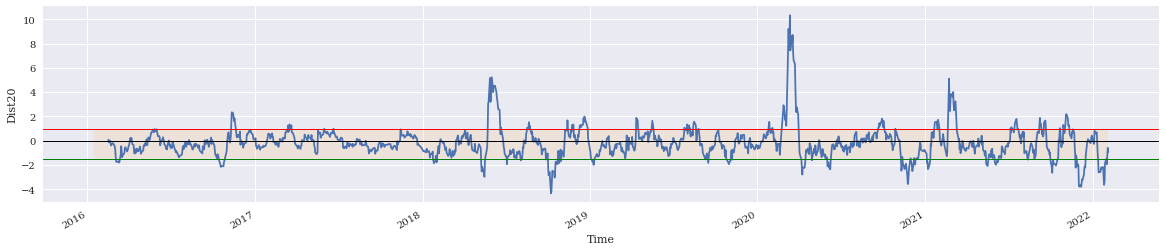

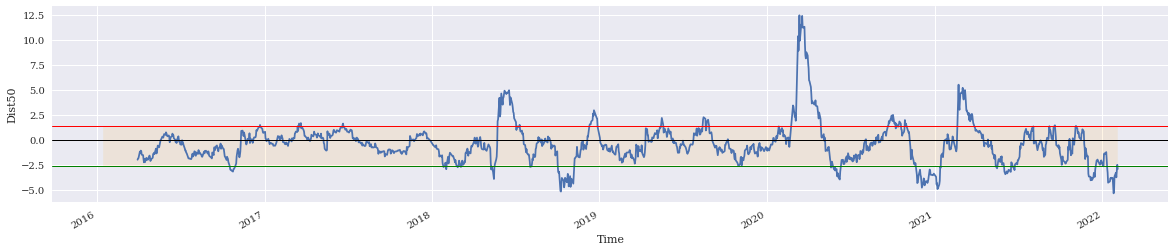

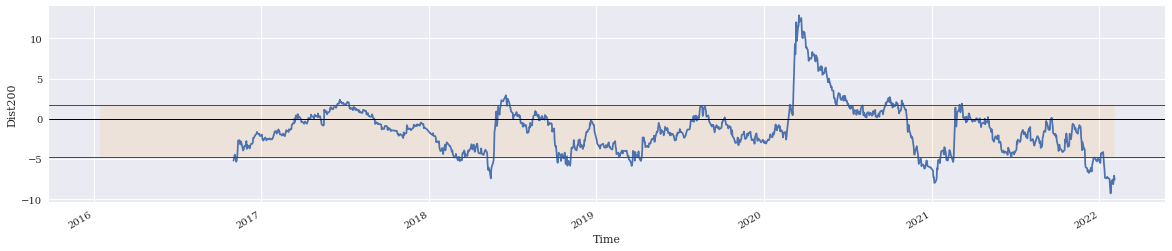

In [118]:
plt.rcParams['figure.figsize'] = (20,4)

per_m20 = percentil(df['Dist20'], up=90, down=10)
ax = df['Dist20'].plot()
ax.fill_between(df.index, per_m20[0], per_m20[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m20[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_m20[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist20')
plt.show()

per_m50 = percentil(df['Dist50'], up=90, down=10)
ax = df['Dist50'].plot()
ax.fill_between(df.index, per_m50[0], per_m50[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m50[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_m50[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist50')
plt.show()

per_m200 = percentil(df['Dist200'], up=90, down=10)
ax = df['Dist200'].plot()
ax.fill_between(df.index, per_m200[0], per_m200[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m200[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_m200[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist200')
plt.show()

In [119]:
df['Dist20'].describe()

count    1481.000000
mean       -0.185885
std         1.328049
min        -4.325500
25%        -0.848000
50%        -0.283500
75%         0.347500
max        10.326500
Name: Dist20, dtype: float64

In [120]:
df['Dist50'].describe()

count    1451.000000
mean       -0.434336
std         2.056910
min        -5.350200
25%        -1.549400
50%        -0.562200
75%         0.443000
max        12.427000
Name: Dist50, dtype: float64

In [121]:
df['Dist200'].describe()

count    1301.000000
mean       -1.337492
std         3.025464
min        -9.250250
25%        -3.342700
50%        -1.565550
75%         0.294550
max        12.849200
Name: Dist200, dtype: float64